In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords

In [3]:
IT_Tickets_DF = pd.read_excel('input_data.xlsx')
IT_Tickets_DF.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
IT_Tickets_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [5]:
IT_Tickets_DF['Description'].fillna(' ',inplace=True)
IT_Tickets_DF['Short description'].fillna(' ',inplace=True)

In [6]:
IT_Tickets_DF['SC + DC + Caller'] =''
for i in range(IT_Tickets_DF.shape[0]):
    if IT_Tickets_DF['Description'][i] == IT_Tickets_DF['Short description'][i]:
        IT_Tickets_DF.loc[i,'SC + DC + Caller'] = IT_Tickets_DF['Caller'][i] + IT_Tickets_DF['Description'][i]
    else:
        IT_Tickets_DF.loc[i,'SC + DC + Caller'] = IT_Tickets_DF['Short description'][i] + IT_Tickets_DF['Caller'][i] + IT_Tickets_DF['Description'][i]

In [8]:
(IT_Tickets_DF['Assignment group'].value_counts()).describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

•	We can see that there 74 groups in the given dataset 

•	Almost last few groups have only one tickets assignment, there is clear data imbalance.

•	We will Group the last few groups into a single group

In [11]:
from dateutil import parser
def is_date(str_):
    try:
        parser.parse(str_)
        return True
    except:
        return False

def Formatting(text):
    text = str(text)
    text=text.lower()
    # Removing date from the text
    text = ' '.join([w for w in text.split() if not is_date(w)])
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Removing addressings
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(charac for charac in text if charac <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for caller in IT_Tickets_DF['Caller'].unique():
        caller_name = [a for a in caller.split()]
        for name in caller_name: 
            text = text.replace(name,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [12]:
IT_Tickets_DF['Cleaned'] = IT_Tickets_DF['SC + DC + Caller'].apply(Formatting)
IT_Tickets_DF.shape

(8500, 7)

In [13]:
Temp = []
for i in range(len(IT_Tickets_DF['Cleaned'])):
    Temp.append(len(IT_Tickets_DF['Cleaned'][i].split()))
IT_Tickets_DF['Length'] = Temp

In [14]:
IT_Tickets_DF = IT_Tickets_DF[IT_Tickets_DF['Length'] >= 2]
IT_Tickets_DF = IT_Tickets_DF.reset_index()
IT_Tickets_DF.drop(['index'],inplace = True,axis = 1)

In [15]:
for i in range(IT_Tickets_DF.shape[0]):
    if len(IT_Tickets_DF['Cleaned'][i].split())>10:
        print('{0} : {1}'.format(i,IT_Tickets_DF['Cleaned'][i]))
        print('\t')

0 : login issue verified user details employee and manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved
	
1 : outlook hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind
	
2 : cant log in to vpn hi cannot log on to vpn best
	
6 : event critical hostname company com the value of mountpoint threshold for oracle sid erpdata event critical hostname company com the value of mountpoint threshold for oracle sid erpdata srpsad srpsad data perpsrpsad is
	
16 : unable to login to company vpn hi am unable to login to company vpn website trying to open new session using the below link but not able to get through pls help urgently as we are working from home tomorrow due to month end closing
	
21 : vpn issue hello helpdesk am not able to connect vpn from home office couple hours ago was connected now it is not wor

692 : after my bios was update can no longer log in to erp get an error every time that try to log into erp get log balancing error could not connect to message server
	
694 : unable to access etime through ie password prompt resulting in an unauthorized access error
	
695 : hostname has drive that is flashing yellow message display is also flashing on and off although it has no error please check hostname shop floor app server drive for possible problems one of the drives is flashing yellow
	
696 : usa and usa perhaps other sites as well outlook refusing to send reply emails usa and usa perhaps other sites as well many users outlook refusing to send reply emails new email will send but reply will stall and outlook freezes with not reponding error this appears to be happening only with office personally am using office got many complaints from usa and complaints from usa mi as well suspect systemic problem company wide
	
697 : access denied access denied collaboration platform check sc

1416 : job job failed in job scheduler at job job failed in job scheduler at
	
1417 : error message trying to log into purchasing to order error message trying to log into purchasing to order user id cuthyunniy have attached the email that shows the errors am receiving
	
1420 : some confidential document was shared on the hub and everyone had access to it some confidential document was shared on the hub and everyone had access to it link mikhghytr this is an issue sent from my iphone begin forwarded message date at am edt itclukpe aimcfeko yjscozva lyjoeacv confidential information on the hub this was brought to my attention this morning by if you search usa jobs on the hub this information is in the results field just thought you all might want to know open
	
1422 : usa backup exec server rgtsm has filed raid hdd physical disk
	
1425 : user id and password fail dear sir one apprentice mr suniythulkuujmar nk is unable to view his salary statements due to user id and password fail pl he

2134 : collaboration platform table for crm hello please add user delthybid jeknosml gkcoltsy to the collaboration platform table for crm
	
2138 : analysis for microsoft excel is no longer available analysis for microsoft excel is no longer available attached you can find the note
	
2139 : erp access issue system sid sid sid sid hrp other sid enter user id of user having the issue hohlbfgtu describe the issue unlock password logon
	
2140 : vpn access to achthyardk computer name awyl summary need vpn provision to access drive from when am away from office
	
2141 : gflewxmn qnxhoryg term date network folder access never received access to tghkris wickhamtf person folder on the network drive did get access to her collaboration platform drive but not her network folder know her network folder is where she saved lot of information really need to have access to this folder to access her documents also m not sure why the communications m receiving regarding her collaboration platform collabor

2796 : computer volume am not getting any volume on my computer please help fix need volume for skype best
	
2798 : chrthryui stavenheim unbale to login to tess via citrix user name is ccftv pm nwfodmhc exurcwkm chrthryui stavenheim trurthyuft aw tess account hello can someone check whether chrthryui stavenheim can login with his account ccftv via the citrix access with this access please inform him and myself when the issue is fixed as we have to generate turnover and satisfy customers manager tess holemaking design automation von chrthryui stavenheim gesendet donnerstag an betreff tess account hello robhyertyj ve been unable to login to tess few weeks now either password och user name is wrong user name is ccftv could you please help me out med nlig lsning best
	
2799 : brxaqlwn auzroqes purchasing check status and reports not seen hello team can you please create credentials for erp sid and maintain the same in the safe area you can copy same access like kantthyhn
	
2805 : problem w

3475 : unable to access bex analyzer unable to access bex analyzer as nothing happens when click pc name lmdl phone
	
3479 : unable to print from the printer hp color laser cp pcl cl unable to print from the printer hp color laser cp pcl cl connected to the user system using teamviewer the printer keeps asking to update drivers tried to install the drivers no go contact computer name lhql user wants to have local it look as there are many users faceing similar issue
	
3482 : user wants to change the erp printer prt prtqv to prt prtqz
	
3484 : i am trying to find an expense report to approve have an email that says have one to approve it is not showing up name bonhyb knepkhsw language browser microsoft internet explorer customer number telephone summary am trying to find an expense report to approve have an email that says have one to approve it is not showing up
	
3486 : cannot connect to hostname engineering application going through company vpn can access hostname hostname and hostna

4142 : vendor and customer balance in local currency list alr and alr help desk in fy the end of month balance in alr is different from the trial balance in previous month end of balance is zero in alr under the same conditions in fy previous month end of balance appear and the end of month balance match between alr and what is the cause
	
4143 : erp access issue passward re set for sid system sid sid sid sid hrp other sid enter user id of user having the issue arrojhsjd transaction code the user needs or was working with describe the issue if you are getting not authorized message recreate the condition then do nsu and attach result to the ticketing tool ticket provide access the same as this other user
	
4146 : need access to shop floor app corrected don have the access to update work centers in shop floor app don have access to the system tab in shop floor app it looks like am missing some items
	
4151 : unable to launch engineering tool name stefyty hipghkinjyt language browser mic

4798 : dell tablet cracked after it was accidentally dropped dell tablet cracked after it was accidentally dropped
	
4799 : approval workflow problems am approfghaching you as we have problems with our approval workflow for credit memo requests respectively rmas opened several tickets regarding this topic which unfortunately did not lead to final solution maybe it is erp language problem for my part anyway hope that you can help to get this fixed the approval levels for our organization are as follows regardless who is the sales person in customer account level afcbrhqw vudghzcb as subsitute if possible level afcbrhqw vudghzcb as substitute if possible level qsoxltny dzjespml tjnwdauo jkdwbhgs as substitute if possible level plus michghytuael nz tjnwdauo jkdwbhgs as substitute if possible it often happens that these workflows are routed to the wrong person lauacyltoe hxgaycze example rma was routed to me at level and approved but then to jmkcewds qkoipbzn at level wo has nothing to do 

5532 : laptop not chatryung from doc station when connected the laptop to doc station its not charging battery
	
5534 : printer configuration printer configuration summary need to configure printer in region kindly help to do the same ricoh aficio mp pcl ii
	
5535 : konto neu erstellen ewew und ewew ewew optiplex lager hr darda ewew optiplex lager hr darda
	
5539 : software not working on laptop engineering tool outlook internet explorer had security warning and all have stopped perform had firewall warning and software stopped working
	
5540 : engineering tool and engineering tool not working hello my system is facing an issues while connecting engineering tool and engineering tool software below is the erro message engineering tool for engineering tool please support executive sales company india ltd mob mail
	
5544 : webshop access hello didn see my customers at webshop distributor tool also cann chose any salesorg have unlocked all my accounts and change the password but the proble

	
6235 : half the icons on my desktop are gone after reboot and updates were applied
	
6237 : usa oh operators are locked out of mii and not able to scan in production and capture value add usa oh operators are locked out of mii and not able to scan in production tortm hortl howthrelte happened twice in one week dmitazhw kxbifzoh
	
6241 : i am stuck has lines lines and have been inwarehouse toold line we cannot pgi am stuck has lines lines and have been inwarehouse toold line we cannot pgi so it has not inwarehouse toold any ideas on how we can get line inwarehouse toold v
	
6245 : device not running dell ml tape library device not running dell ml tape library backup device not running error say open door
	
6247 : adobe reader on my pc suddenly will not work immediate crash adobe has stopped working
	
6251 : ticket update name erirtc language browser microsoft internet explorer customer number telephone summary following up on ctc code application incident ticket no can we please get t

6917 : telephony software didn full update an find the log in need telephony software to log into phone system to take calls
	
6920 : ticket update am checking up on the status of completion for it ticket inc please provide an update and expected completion date
	
6924 : in erp md for it show delivery note calling from plant plant in erp md for it show delivery note deleted this yesterday and vln confirms the deletion yet the delivery note still shows open in md with pieces will you please remove so the pieces are return to stock
	
6926 : power surge on hub port prompts am getting frequent notification of power surge on hub port as attached screenshot in my laptop kindly check and let me know any action needed to be done to resolve this
	
6928 : erp log in update needed urgently please good day please can you do erp log in update so that can get access to the erp quality management system sid
	
6929 : emails not routing from outlook into telephony software am entering this ticket to co

	
7571 : abended job in job scheduler job zkbogxib qsejzdzo abended job in job scheduler job at
	
7572 : abended job in job scheduler job zkbogxib qsejzdzo abended job in job scheduler job at
	
7573 : abended job in job scheduler job zkbogxib qsejzdzo abended job in job scheduler job at
	
7575 : reset microsoft online services password for microsoft on behalf of company inc am nwfodmhc exurcwkm tiyhum kuyiomar rad request to reset microsoft online services password for importance high request to reset user password the following user in your organization has requested password reset be performed for their account first name rolghtyuando last name santolgiy consider contacting this user to validate this request is authentic before continuing if you have determined that this is valid request use your service admin portal office windows intune windows azure etc to reset the password for this user want to let you users reset their own passwords check out how you can enable password reset f

8256 : network outage sao pollaurido mercedes benz plant network is down since et on no backup circuit what type of outage network circuit power please specify what type of outage top cert site no yes no na when did it start am on scheduled maintenance power no yes no na company power provider power scheduled maintenance network no yes no na company maint yes no provider maint ticket does site have backup circuit no yes no na backup circuit active na yes no na site contact notified phone email no yes no na remote dial in na yes no na equipment reset no yes no na verified site working on backup circuit na yes no na vendor ticket global telecom verizon telecom vendor telecom vendor global telecom notified gsc yes no na cert started yes no na additional diagnostics
	
8257 : abended job in job scheduler apo cif pds amzkbogxib qsejzdzo abended job in job scheduler apo cif pds am at
	
8258 : abended job in job scheduler apo cif pds euzkbogxib qsejzdzo abended job in job scheduler apo cif pds

In [16]:
IT_Tickets_DF.iloc[2866,:]

Short description      i did a po and it received with no problem, i ...
Description            i did a po and it received with no problem, i ...
Caller                                                 vwaufgxr nvdyhlqk
Assignment group                                                  GRP_18
SC + DC + Caller       i did a po and it received with no problem, i ...
Assignment RE-group                                               GRP_18
Cleaned                i did po and it received with no problem try t...
Length                                                                53
Name: 2866, dtype: object

In [17]:
from google_trans_new import google_translator
import time
import langdetect

def translate(text):
    translator = google_translator(url_suffix="ind",timeout=5)
    translatedText = translator.translate(text)
    time.sleep(0.5)
    return translatedText.lower()

In [18]:
def detect_language_gog(text):
    translator = google_translator()
    temp = translator.detect(text)
    time.sleep(0.5)
    return(temp)

def detect_language(text):
    return(langdetect.detect(text))

In [19]:
IT_Tickets_DF['Language'] = IT_Tickets_DF['Cleaned'].apply(detect_language)

In [20]:
IT_Tickets_DF['Language'].unique()

array(['en', 'no', 'es', 'it', 'af', 'sv', 'sl', 'ca', 'tl', 'fr', 'nl',
       'id', 'fi', 'de', 'cy', 'ro', 'pl', 'da', 'pt', 'so', 'sq', 'et',
       'cs', 'sk', 'hr', 'lt'], dtype=object)

In [21]:
Non_English_Index = IT_Tickets_DF[IT_Tickets_DF['Language'] != 'en'].index

In [22]:
for i in Non_English_Index:
    Lang = detect_language_gog(IT_Tickets_DF.loc[i,'Cleaned'])[0]
    IT_Tickets_DF.loc[i,'Language'] = Lang
    if Lang != 'en':
        IT_Tickets_DF.loc[i,'Cleaned'] = translate(IT_Tickets_DF.loc[i,'Cleaned'])

### Removing Stop words

In [23]:
from nltk.corpus import stopwords
for i,text in enumerate(IT_Tickets_DF['Cleaned']):
    IT_Tickets_DF.loc[i,'Cleaned'] =" ".join(word for word in text.split(' ') if word not in stopwords.words('english'))

### Lemmatize Words

In [24]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def lemmatize(text):
    doc = nlp(text)
    allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
    temp = []
    for word in doc:
         if word.pos_ in allowed_postags:
            temp.append(word.lemma_)
    return(' '.join(temp))

In [26]:
for i in IT_Tickets_DF.index:
    IT_Tickets_DF.loc[i,'Cleaned'] = lemmatize(IT_Tickets_DF.loc[i,'Cleaned'])

In [7]:
pd.DataFrame(IT_Tickets_DF['Assignment group'].value_counts())

,Assignment group
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_70,1
GRP_67,1
GRP_73,1
GRP_64,1


In [30]:
Counts = pd.DataFrame(IT_Tickets_DF['Assignment group'].value_counts())
Others = []
for Group in IT_Tickets_DF['Assignment group'].unique():
    if Counts.loc[Group][0] < 100:
        Others.append(Group)
print('{0} Groups in dataset have less than 100 samples'.format(len(Others)))

IT_Tickets_DF['Assignment RE-group'] =IT_Tickets_DF['Assignment group'].apply(lambda x: 'Others' if x in Others else x)

58 Groups in dataset have less than 20 samples


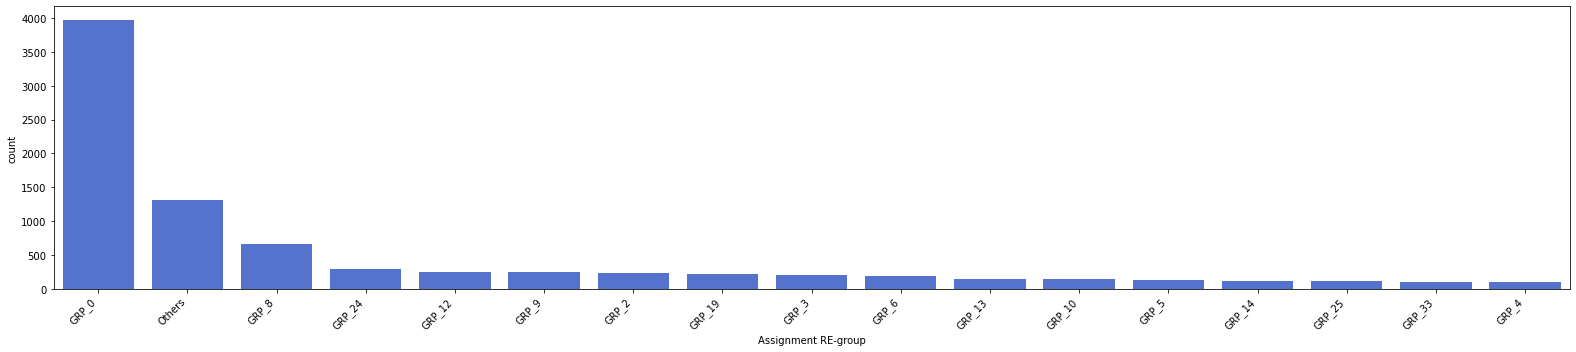

In [31]:
plt.subplots(figsize=(22,5))
descending_order = IT_Tickets_DF['Assignment RE-group'].value_counts().sort_values(ascending=False).index
ax=sns.countplot(x='Assignment RE-group', data=IT_Tickets_DF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [45]:
data =  IT_Tickets_DF.copy()
data['words'] = data.Cleaned.apply(lambda x : len(x.split()))
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,8439.0,29.079512,53.201489,2.0,7.0,16.0,33.0,1033.0
words,8439.0,18.148122,35.236456,0.0,5.0,10.0,20.0,730.0


In [48]:
data['bins']=pd.cut(data.words, bins=[0,50,100,200,300,400,500,600,700,np.inf], labels=['0-50','50-100', '100-200', '200-300','300-400' ,'400-500','500-600','600-700','>700'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [53]:
word_distribution

,bins,counts
0,0-50,7958
1,50-100,383
2,100-200,58
3,200-300,15
4,300-400,6
5,400-500,5
6,500-600,0
7,600-700,9
8,>700,3


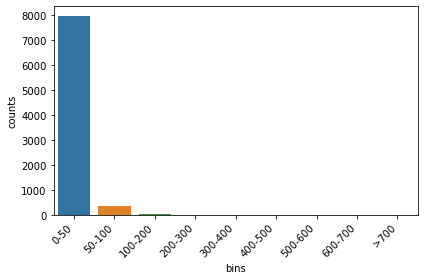

In [52]:
ax= sns.barplot(x='bins', y='counts', data=word_distribution)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Trying spell checkers ( Will try later)

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker(distance=1)
spell.word_frequency.load_words(['azure','skype','hostname','oracle','erpdata','vpn'])
# find those words that may be misspelled
misspelled = spell.unknown(IT_Tickets_DF['Cleaned'][8337].split())

for word in misspelled:
    # Get the one `most likely` answer
    print(word)
    print(spell.correction(word))

#     # Get a list of `likely` options
#     print(spell.candidates(word))

In [28]:
## Remove repeated words

In [39]:
# # Gensim
# from gensim.models import Phrases
# from gensim.utils import simple_preprocess

# Request_List =itTicketDF.Cleaned.values.tolist()


# def sent_to_words(sentences):
#     for sentence in sentences:
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Df_words = list(sent_to_words(Request_List))

# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
# bigram_mod = gensim.models.phrases.Phraser(bigram)

# def make_bigrams(texts):
#     return [bigram_mod[doc] for doc in texts]

# # Form Bigrams
# Df_words_bigrams = make_bigrams(data_words)

In [37]:
IT_Tickets_DF

,Short description,Description,Caller,Assignment group,SC + DC + Caller,Assignment RE-group,Cleaned,Length,Language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issuespxjnwir pjlcoqds-verified user det...,GRP_0,login issue verify user detail employee manage...,36,en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlookhmjdrvpb komuaywn\r\n\r\nreceived from:...,GRP_0,outlook hello team meeting skype meeting appea...,24,en
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpneylqgodm ybqkwiam\r\n\r\nrec...,GRP_0,log vpn log vpn good,12,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz gcpydtequnable to access hr_tool page,GRP_0,unable access hr tool page,6,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme qhcozdfxskype error,GRP_0,skype error,2,en
...,...,...,...,...,...,...,...,...,...
8434,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mailavglmrts vhqm...,Others,email come mail good afternoon receiving email...,21,en
8435,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,rbozivdq gmlhrtvptelephony_software issue,GRP_0,telephony software issue,3,en
8436,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,oybwdsgx oxyhwrfzvip2: windows password reset ...,GRP_0,vip window password reset pedxruyf,7,en
8437,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionandoufawcgob aowhxjk...,Others,machine unable access machine utility finish d...,20,en


In [13]:
IT_Tickets_DF = pd.read_excel('Cleaned_data.xlsx')
IT_Tickets_DF.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,SC + DC + Caller,Assignment RE-group,Cleaned,Length,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issuespxjnwir pjlcoqds-verified user det...,GRP_0,login issue verify user detail employee manage...,36,en
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlookhmjdrvpb komuaywn_x000D_\n_x000D_\nrece...,GRP_0,outlook hello team meeting skype meeting appea...,24,en
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpneylqgodm ybqkwiam_x000D_\n_x...,GRP_0,log vpn log vpn good,12,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz gcpydtequnable to access hr_tool page,GRP_0,unable access hr tool page,6,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme qhcozdfxskype error,GRP_0,skype error,2,en


In [14]:
Empty_Rows = IT_Tickets_DF[IT_Tickets_DF.isnull().any(axis=1)].index
IT_Tickets_DF.drop(Empty_Rows,axis = 0,inplace = True)

In [15]:
IT_Tickets_DF.dropna()
IT_Tickets_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8437 entries, 0 to 8438
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           8437 non-null   int64 
 1   Short description    8437 non-null   object
 2   Description          8437 non-null   object
 3   Caller               8437 non-null   object
 4   Assignment group     8437 non-null   object
 5   SC + DC + Caller     8437 non-null   object
 6   Assignment RE-group  8437 non-null   object
 7   Cleaned              8437 non-null   object
 8   Length               8437 non-null   int64 
 9   Language             8437 non-null   object
dtypes: int64(2), object(8)
memory usage: 725.1+ KB


In [16]:
IT_Tickets_DF.to_excel('Cleaned_data.xlsx')